<center>
<h4>Diplomatura AACSyA 2018 - FaMAF - UNC</h4>
<h3>Análisis y visualización de datos</h3>
</center>

# Tarea integradora - Parte 2

En esta notebook trabajeremos con variables aleatorias contínuas y distribuciones de probabilidad conocidas. En lugar de la librería pandas, utilizaremos scipy que también implementa numerosas funciones útiles para proceso de datos numéricos.

In [33]:
%matplotlib inline
from scipy.stats import norm
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import expon
import numpy as np

## Ejercicio 1

Desarrollar analíticamente el tiempo de vida en horas que una computadora funciona antes de descomponerse es una v.a.
continua con f.d.p. dada por

$$
f ( x ) = \begin{cases}
~~ 0.01e^{0.01}x & si ~~ x ≥ 0 \\
~~ 0 & si ~~ x<0
\end{cases}
$$

* Hallar la F.d.a. de X

* ¿Cuál es la probabilidad que la computadora funcione entre 50 y 150 horas antes de descomponerse?

* ¿Cuál es la probabilidad que una computadora se descomponga antes de registrar 100 horas de uso?

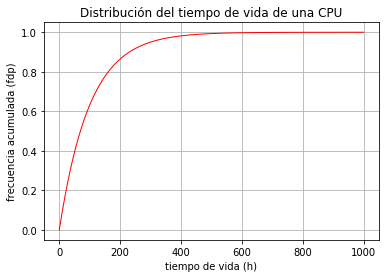

La probabilidad que la computadora funcione entre 50 y 150 horas antes de descomponerse es de 0.383
La probabilidad que una computadora se descomponga antes de registrar 100 horas de uso es de 0.632


In [34]:
lmda = 0.01
# Dibujamos la función de distribución acumulada
fig, ax = plt.subplots(1, 1) # crea un contenedor para graficos
x = np.linspace(0, 1000, 1000) 
# Pasamos scale = 100 ya que scale = 1 / lambda y fdp = (lamda*e^(-lambda*x))
rv = expon(scale=1/lmda)
# Dibujamoe la función de distribución exponencial con lambda = 0.01
ax.plot(x, rv.cdf(x), 'r-', lw=1)
ax.set(xlabel='tiempo de vida (h)', ylabel='frecuencia acumulada (fdp)',
       title='Distribución del tiempo de vida de una CPU')
ax.grid()
plt.show()

# Obtenemos los valores de probabilidad a partir de la función de distribución acumulada
print("La probabilidad que la computadora funcione entre 50 y 150 horas antes de descomponerse es de {:.3f}"\
.format(rv.cdf(150) - rv.cdf(50)))

print("La probabilidad que una computadora se descomponga antes de registrar 100 horas de uso es de {:.3f}"\
.format(rv.cdf(100)))

## Ejercicio 2

Modificar los valores de mu, sigma y el rango de la siguiente distribución normal. Escribir un breve resumen sobre como se relacionan estas variables sobre el dibujo de la campana de Gauss.

In [35]:
# Define parameters for normal distribution.
mu = 2
sigma = 3
rng = range(-20,30)

def graphic_normal(mu, sigma, rng, n_examples=10000):
    # Generate normal distribution with given mean and standard deviation.
    dist = norm(mu, sigma)

    plt.figure(figsize=(10,8))
    plt.subplot(311) # Creates a 3 row, 1 column grid of plots, and renders the following chart in slot 1.
    plt.plot(rng, dist.pdf(rng), 'r', linewidth=2)
    plt.title('Probability density function of normal distribution')


    # Plot probability density function and of this distribution.
    plt.subplot(312)
    plt.plot(rng, dist.cdf(rng))
    plt.title('Cumulutative distribution function of normal distribution')

    # Draw 1000 samples from the random variable.
    sample = dist.rvs(size=n_examples)

    print("Sample descriptive statistics:")
    print(pd.DataFrame(sample).describe())

    # Plot a histogram of the samples.
    plt.subplot(313)
    plt.hist(sample, bins=100, normed=True)
    plt.plot(rng, dist.pdf(rng), 'r--', linewidth=2)
    plt.title('{} random samples from normal distribution'.format(n_examples))

    plt.tight_layout()  # Make space for titles 

Sample descriptive statistics:
                  0
count  10000.000000
mean       1.957206
std        2.990523
min       -9.153427
25%       -0.054255
50%        1.987432
75%        3.998808
max       13.039934


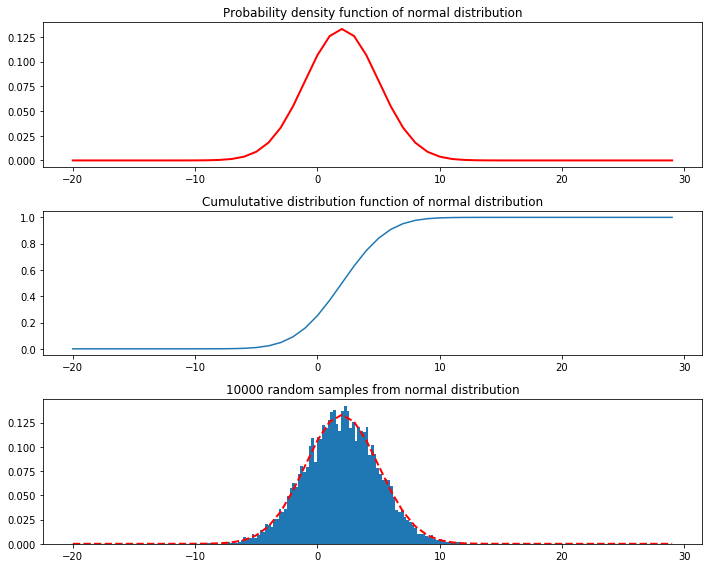

In [36]:
graphic_normal(mu, sigma, rng)

La distribución normal es simétrica con media 0 y es asintótica en el eje horizontal con un dominio entre [-∞, ∞].
- Si cambiamos el rango y lo hacemos muy grande, no hay cambios en la forma de la distribución pero el eje de ordenadas cambia de escala. Si definimos un dominio muy grande veremos una linea situada en x = 0.
- Si modificamos sigma observamos que la forma de la campana se hace mas estrecha y puntiaguda para sigmas bajos y más ancha y plana para sigmas altos. Si sigma es pequeño la campana se contrae en el eje X y esto es porque los valores son más próximos a la media, a su vez, se expande en el eje Y. Si sigma es grande los valores en el eje X se expanden y se contraen en el eje Y. Esto es debido a que, con sigmas pequeños, los datos son próximos a la media y con sigmas altos son lejanos. Como el area bajo la curva debe de ser siempre 1, esta es la condición de porque se expanden o contraen los valores en Y.
- Si cambiamos mu la grafica se mueve hacia la izquierda, con mu negativos y a la derecha con mu positivos. Este cambio no afecta a la forma de la campana pero si a su posición.
- Como conclusión diremos que la media condiciona la posición a partir de la cual se distribuyen los datos y sigma la forma en la que se distribuyen.